# Image Segmentation In Depth

Image segmentation is a crucial task in computer vision that involves dividing an image into meaningful segments to simplify or change its representation, making it more useful for analysis. 

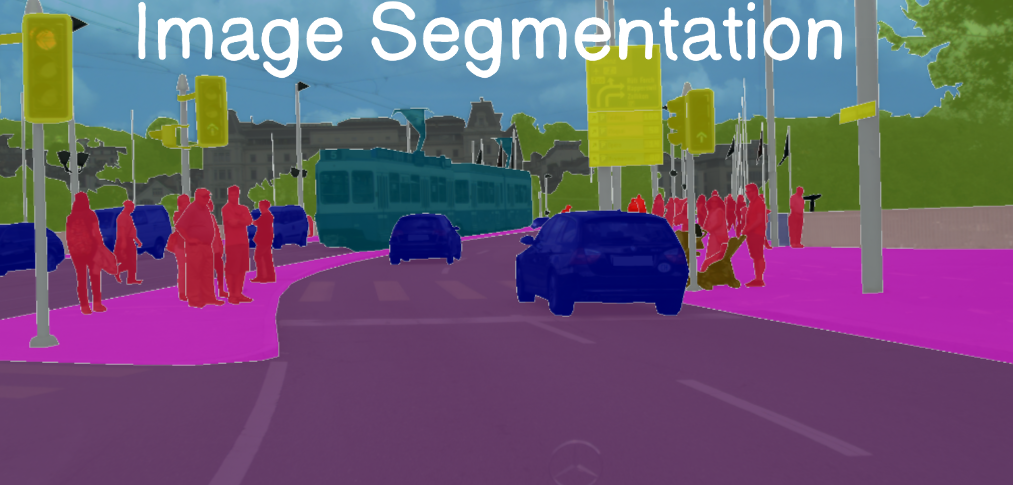

**Contents**

- Introduction
- Types Of Image Segmentation
- Method Of Image Segmentation
- Evaluation Metrics

## **Introduction**

Image segmentation involves partitioning a digital image into multiple regions (sets of pixels) to simplify the image or make it more meaningful and easier to analyze. The goal is to change the representation of an image into something that is more meaningful and easier to analyze. Segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images.

### **Applications of Image Segmentation**

1. **Medical Imaging:**
    - Tumor detection, organ segmentation, and other diagnostic purposes.
2. **Autonomous Vehicles:**
    - Object detection, road segmentation, and obstacle avoidance.
3. **Satellite and Aerial Imaging:**
    - Land cover classification, urban planning, and environmental monitoring.
4. **Face Recognition:**
    - Facial feature extraction, emotion detection, and identity verification.
5. **Agriculture:**
    - Crop monitoring, disease detection, and yield estimation.

## **Types of Image Segmentation**

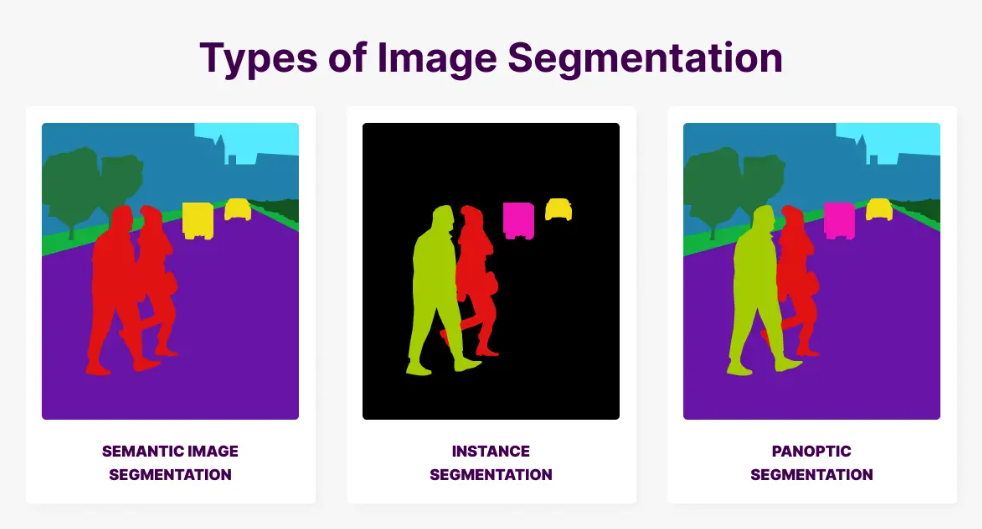

1. **Semantic Segmentation:**
    - Labels each pixel of an image with a corresponding class of what is being represented.
    - Example: Every pixel in an image of a dog would be labeled as 'dog'.
2. **Instance Segmentation:**
    - Extends semantic segmentation by identifying distinct instances of objects.
    - Example: Two dogs in an image would be labeled as 'dog 1' and 'dog 2'.
3. **Panoptic Segmentation:**
    - Combines semantic and instance segmentation. It labels each pixel with a class and instance ID.
    - Example: Segmentation of background (semantic) and individual objects (instance).

## **Methods of Image Segmentation**

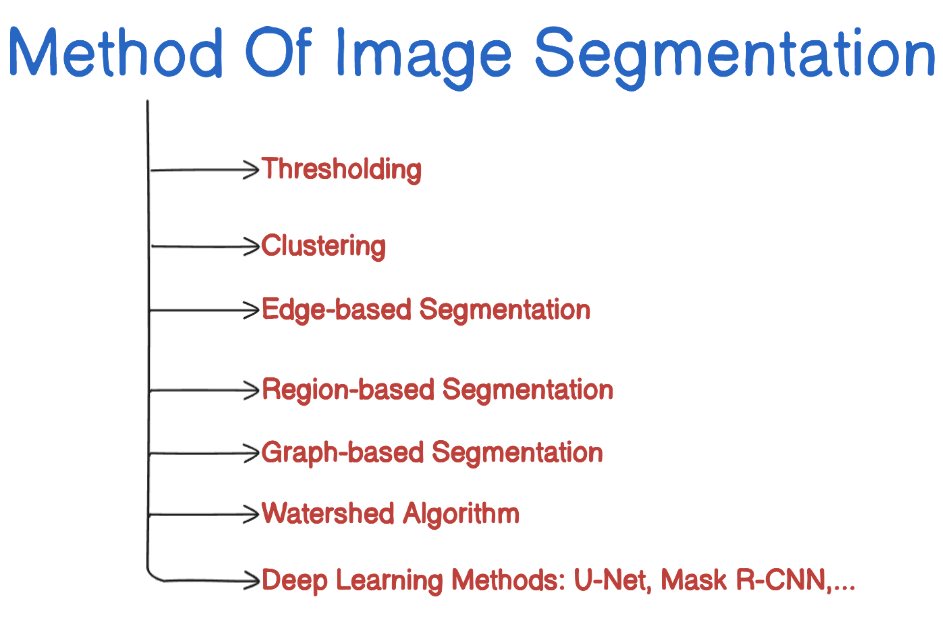

### **1. Thresholding:**

- Simplest method based on image histogram.
- Threshold image segmentation is a fundamental technique in image processing that is used to separate objects of interest (foreground) from the background in an image. The basic idea is to convert a grayscale image into a binary image, where pixels are classified as either belonging to the object (foreground) or the background based on a certain threshold value.
- Threshold image segmentation is simple yet powerful, often serving as a precursor to more advanced image analysis techniques.

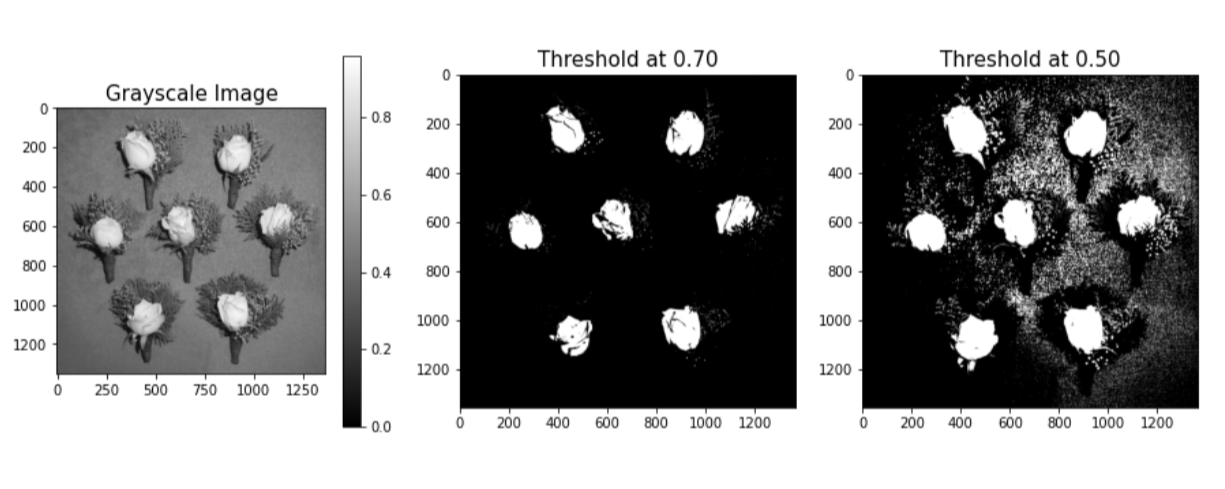

### **Steps in Threshold Image Segmentation**

1. **Convert Image to Grayscale**:
    - If the input image is in color (RGB), it is first converted to grayscale, as thresholding typically operates on a single channel.
2. **Choose a Threshold Value**:
    - The threshold value can be chosen manually or automatically. This value determines the cutoff point for separating the object from the background.
    - **Manual Thresholding**: A specific threshold value is chosen by the user.
    - **Automatic Thresholding**: Methods like Otsu's method or adaptive thresholding automatically determine the optimal threshold value based on the image histogram.
3. **Apply the Threshold**:
    - Each pixel in the grayscale image is compared to the threshold value:
        - If the pixel intensity is greater than or equal to the threshold, it is assigned to the foreground (typically white, 255).
        - If the pixel intensity is less than the threshold, it is assigned to the background (typically black, 0).
4. **Generate Binary Image**:
    - The result is a binary image, where the foreground is distinguished from the background.

### Types of Thresholding

1. **Global Thresholding**:
    - A single threshold value is used for the entire image.
2. **Adaptive Thresholding**:
    - The threshold value is calculated for smaller regions of the image, making it useful for images with varying lighting conditions.
3. **Otsu's Thresholding**:
    - A global thresholding method that automatically calculates the optimal threshold value by minimizing the intra-class variance between the foreground and background.

### Example

Suppose you have an image of a document with text on a white background. The goal is to segment the text (black) from the background (white):

1. Convert the image to grayscale.
2. Apply a threshold, say 128:
    - Pixels with intensity ≥ 128 are set to 255 (white, background).
    - Pixels with intensity < 128 are set to 0 (black, foreground).
3. The resulting binary image will have the text in black and the background in white.

### **2. Clustering:**

- Clustering image segmentation is a technique used in image processing to partition an image into multiple regions or segments based on the similarity of pixels. Unlike thresholding, which works on pixel intensity values, clustering methods group pixels into clusters based on features like color, intensity, or texture.

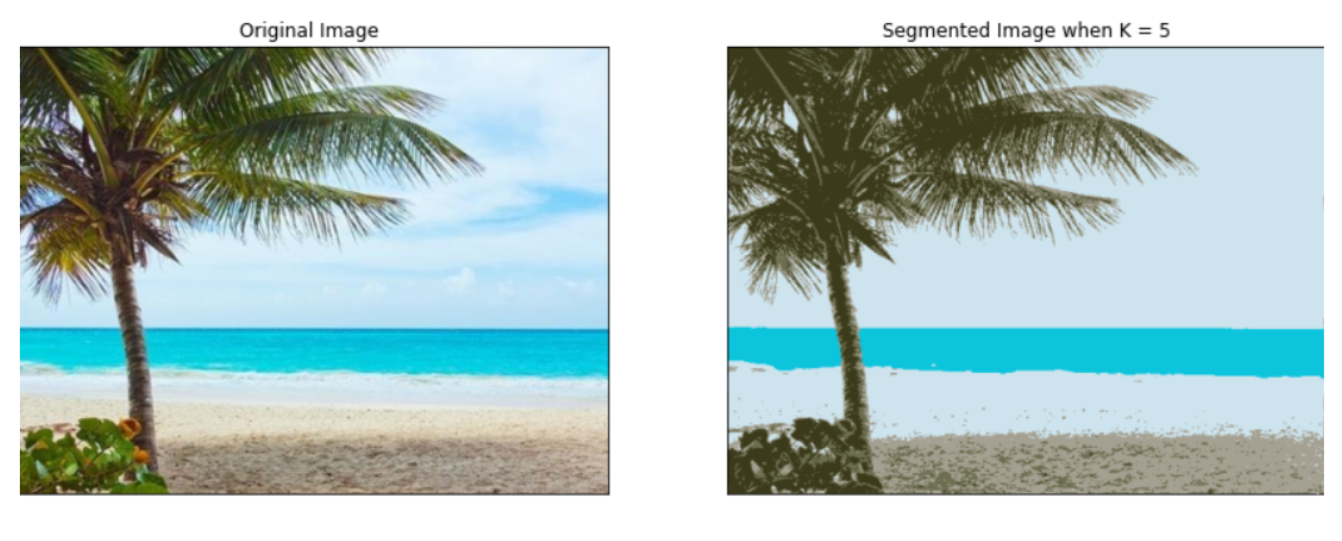

### Key Concepts

1. **Clustering**:
    - Clustering is an unsupervised machine learning technique that groups similar data points together. In the context of image segmentation, pixels with similar characteristics are grouped into clusters.
2. **Feature Space**:
    - The feature space is a multidimensional space where each dimension represents a feature of the pixels. Common features include color (e.g., RGB values), intensity, or spatial information (pixel coordinates).
3. **Centroids**:
    - In clustering, centroids represent the center of a cluster in the feature space. Pixels are assigned to the cluster with the nearest centroid.

### Common Clustering Techniques for Image Segmentation

1. **K-Means Clustering**:
    - **Overview**: K-means is one of the most popular clustering algorithms. It works by dividing the image's pixel data into `K` clusters, where `K` is a predefined number of segments.
    - **Process**:
        1. Randomly initialize `K` centroids in the feature space.
        2. Assign each pixel to the nearest centroid, forming `K` clusters.
        3. Recalculate the centroids based on the current cluster members.
        4. Repeat the assignment and recalculation steps until the centroids no longer change significantly.
        5. The resulting clusters correspond to different segments in the image.
    - **Advantages**: Simple and fast for a small number of clusters.
    - **Drawbacks**: The number of clusters `K` needs to be specified beforehand, and it may not work well for images with complex structures.
2. **Mean Shift Clustering**:
    - **Overview**: Mean shift is a non-parametric clustering technique that does not require the number of clusters to be specified beforehand. It works by iteratively shifting data points towards the densest region in the feature space.
    - **Process**:
        1. For each pixel, move towards the region with the highest density of neighboring pixels (mean shift).
        2. The pixels that converge to the same point form a cluster.
        3. The result is a segmentation map where each segment corresponds to a mode of the data distribution.
    - **Advantages**: No need to specify the number of clusters; can handle arbitrary shapes of clusters.
    - **Drawbacks**: Computationally expensive, especially for large images.
3. **Gaussian Mixture Models (GMM)**:
    - **Overview**: GMM is a probabilistic model that assumes that the pixel data can be represented as a mixture of several Gaussian distributions, each corresponding to a cluster.
    - **Process**:
        1. Initialize parameters for `K` Gaussian distributions (mean, covariance, and weight).
        2. Use the Expectation-Maximization (EM) algorithm to iteratively adjust the parameters to best fit the data.
        3. Assign each pixel to the Gaussian distribution that has the highest probability of generating it.
    - **Advantages**: Can model clusters with different shapes and sizes.
    - **Drawbacks**: Like K-means, requires the number of clusters to be specified, and it can be computationally intensive.
4. **Agglomerative Hierarchical Clustering**:
    - **Overview**: This method builds a hierarchy of clusters by successively merging or splitting existing clusters.
    - **Process**:
        1. Start with each pixel as its own cluster.
        2. Iteratively merge the most similar clusters until the desired number of clusters is reached or all pixels are merged into a single cluster.
    - **Advantages**: Does not require specifying the number of clusters beforehand; can provide a hierarchy of segments.
    - **Drawbacks**: Computationally intensive, especially for large images.

### Example Workflow with K-Means

1. **Convert Image to Feature Space**:
    - For example, use the RGB color values of each pixel as the feature vector.
2. **Apply K-Means Clustering**:
    - Choose a value for `K` (e.g., 3 for segmenting into 3 regions).
    - Apply the K-means algorithm to group pixels into `K` clusters.
3. **Map Clusters to Segments**:
    - Each cluster corresponds to a distinct segment in the image.
    - Assign a unique color or label to each segment for visualization.
4. **Resulting Segmented Image**:
    - The image will be divided into `K` distinct regions, each representing a segment.

### **3. Edge-based Segmentation:**

- Edge-based segmentation is a technique in image processing that focuses on identifying and locating the boundaries or edges within an image to segment it into different regions.
- Edge-based segmentation is a powerful technique, particularly effective when the goal is to accurately delineate the boundaries of objects within an image.

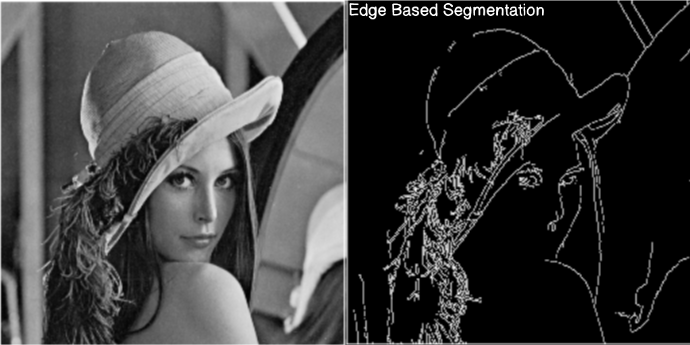

### Key Concepts

1. **Edges**:
    - Edges in an image are locations with a sharp change in intensity or color. These changes typically correspond to the boundaries between different regions or objects in the image.
2. **Edge Detection**:
    - Edge detection is the process of identifying these significant changes in intensity. Common edge detection algorithms include Sobel, Prewitt, Roberts, Canny, and Laplacian operators.
3. **Segmentation**:
    - After detecting the edges, the image is segmented by identifying the regions bounded by these edges. The goal is to partition the image into meaningful regions, typically corresponding to objects or areas of interest.

### Common Edge Detection Techniques

1. **Sobel Operator**:
    - **Overview**: The Sobel operator is a simple edge detection method that uses a pair of 3x3 convolution kernels to approximate the gradient of the image's intensity function.
    - **Process**:
        - Apply the Sobel operator in both the horizontal (x) and vertical (y) directions to detect edges.
        - Compute the gradient magnitude and direction for each pixel.
        - Threshold the gradient magnitude to keep only the strongest edges.
    - **Applications**: Often used for detecting edges in images with relatively simple boundaries.
2. **Canny Edge Detector**:
    - **Overview**: The Canny edge detector is one of the most widely used edge detection algorithms, known for its robustness and accuracy. It involves multiple steps to detect edges while minimizing noise.
    - **Process**:
        1. **Gaussian Blurring**: Smooth the image with a Gaussian filter to reduce noise.
        2. **Gradient Calculation**: Calculate the intensity gradients using operators like Sobel.
        3. **Non-Maximum Suppression**: Thin the edges by suppressing all gradient pixels that are not local maxima.
        4. **Double Thresholding**: Apply two thresholds to identify strong and weak edges.
        5. **Edge Tracking by Hysteresis**: Finalize edge detection by connecting weak edges to strong edges if they are contiguous.
    - **Applications**: Suitable for images where edge clarity and noise reduction are critical, such as in medical imaging or object detection.
3. **Laplacian of Gaussian (LoG)**:
    - **Overview**: The LoG method combines Gaussian smoothing and the Laplacian operator to detect edges. It detects zero-crossings in the second derivative of the image intensity, corresponding to edges.
    - **Process**:
        1. Smooth the image with a Gaussian filter.
        2. Apply the Laplacian operator to the smoothed image.
        3. Identify zero-crossings in the Laplacian-filtered image as edges.
    - **Applications**: Effective for detecting edges in images with fine details.

### Steps in Edge-Based Segmentation

1. **Preprocessing**:
    - Often involves smoothing the image to reduce noise, which can lead to false edge detections.
2. **Edge Detection**:
    - Apply one of the edge detection algorithms (like Sobel, Canny, or LoG) to identify edges in the image.
3. **Edge Linking and Contour Detection**:
    - After detecting edges, the next step is to link these edges to form continuous boundaries or contours around objects. Techniques like Hough Transform can be used for this purpose.
4. **Region Segmentation**:
    - Use the detected edges to segment the image into different regions. The regions enclosed by edges correspond to different segments.
5. **Post-Processing**:
    - This may involve refining the edges, filling gaps in detected boundaries, or removing small, spurious edges.

### Example Workflow Using the Canny Edge Detector

1. **Input Image**:
    - Start with a grayscale or color image.
2. **Apply Gaussian Blurring**:
    - Smooth the image to reduce noise that could cause false edges.
3. **Compute Gradients**:
    - Use the Sobel operator to compute the gradients in the x and y directions.
4. **Non-Maximum Suppression**:
    - Thin out the edges by keeping only the pixels that are local maxima in the gradient direction.
5. **Double Thresholding**:
    - Apply a high and a low threshold to detect strong and weak edges.
6. **Edge Tracking by Hysteresis**:
    - Connect weak edges to strong edges if they are connected, to form continuous boundaries.
7. **Segment the Image**:
    - Use the detected edges to define and segment the regions of interest.

### **4. Region-based Segmentation:**

- Based on the similarity of pixels.
- Region-based segmentation is a technique in image processing that divides an image into regions based on the similarity of pixels within a region. Unlike edge-based segmentation, which focuses on detecting boundaries, region-based segmentation emphasizes grouping together pixels that share common properties, such as intensity, color, or texture.
- Region-based segmentation is particularly effective for images where the regions of interest are homogeneous and well-defined. It is widely used in fields where precision and adaptability to complex structures are crucial, such as medical imaging and remote sensing.

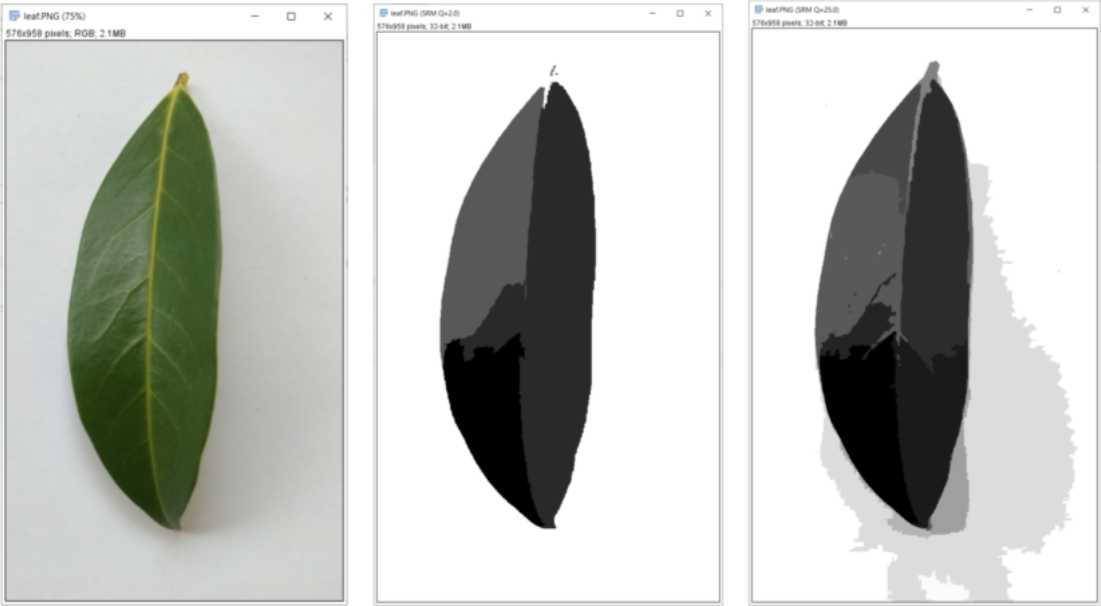

### Key Concepts

1. **Region**:
    - A region is a contiguous group of pixels in an image that are similar according to some criteria (e.g., color, intensity, or texture).
2. **Homogeneity**:
    - The core idea of region-based segmentation is to identify regions that are homogeneous, meaning all pixels within a region share similar properties.
3. **Region Growing**:
    - This is a process of starting with a seed point and expanding the region by adding neighboring pixels that meet the homogeneity criteria.
4. **Region Merging and Splitting**:
    - Regions may be merged if they are similar enough, or split if they are too heterogeneous, to refine the segmentation.

### Common Region-Based Segmentation Techniques

1. **Region Growing**:
    - **Overview**: Region growing is a simple yet effective technique where segmentation starts from seed points and grows by including neighboring pixels that have similar properties.
    - **Process**:
        1. **Seed Selection**: Choose one or more seed points based on some criteria (e.g., intensity).
        2. **Region Growth**: Expand the region by adding neighboring pixels that are similar to the seed.
        3. **Stopping Criterion**: Stop growing when no more neighboring pixels meet the homogeneity criterion.
    - **Advantages**: Simple and effective for images with clearly defined regions.
    - **Drawbacks**: Sensitive to the choice of seed points and noise, and can be slow for large images.
2. **Region Splitting and Merging**:
    - **Overview**: This method starts by treating the entire image as one region and then splits it into smaller regions or merges smaller regions to form larger ones based on homogeneity.
    - **Process**:
        1. **Splitting**: If a region is too heterogeneous, split it into smaller regions (usually into quadrants).
        2. **Merging**: If neighboring regions are similar enough, merge them into a single region.
        3. **Iterate**: Continue splitting and merging until no more changes are needed.
    - **Advantages**: Flexible and can handle varying region sizes and shapes.
    - **Drawbacks**: Computationally intensive and requires careful selection of criteria for splitting and merging.
3. **Watershed Segmentation**:
    - **Overview**: Watershed segmentation is a powerful technique often used in gradient images. It treats the image as a topographic surface where high-intensity values correspond to ridges, and low-intensity values correspond to valleys.
    - **Process**:
        1. **Gradient Calculation**: Compute the gradient magnitude of the image to highlight edges.
        2. **Flooding**: Imagine filling the valleys (low-intensity areas) with water; the water will "flood" the valleys and create watersheds at the ridges (high-intensity areas).
        3. **Region Formation**: The watersheds correspond to the boundaries of regions.
    - **Advantages**: Excellent for detecting complex shapes and boundaries.
    - **Drawbacks**: Sensitive to noise and can lead to over-segmentation if not carefully controlled.

### Steps in Region-Based Segmentation

1. **Preprocessing**:
    - Optional but often includes smoothing the image to reduce noise, which can interfere with segmentation.
2. **Initial Region Identification**:
    - Depending on the method, this could involve selecting seed points (region growing) or identifying initial large regions (region splitting).
3. **Region Formation**:
    - Grow, split, or merge regions based on the similarity criteria. This step defines the boundaries of each region.
4. **Post-Processing**:
    - Refine the regions by merging small regions with larger ones or smoothing the boundaries to remove irregularities.

### Example Workflow Using Region Growing

1. **Input Image**:
    - Start with a grayscale or color image.
2. **Seed Selection**:
    - Select one or more seed points based on some criteria, such as intensity or color.
3. **Region Growing**:
    - Expand the region by including neighboring pixels that are similar to the seed point, typically based on intensity.
4. **Stopping Criterion**:
    - Stop growing when no more pixels meet the homogeneity criterion.
5. **Resulting Segmented Image**:
    - The image is divided into regions that correspond to different segments based on the initial seeds and the growth process.

### **5. Graph-based Segmentation:**

- Models the image as a graph where pixels are nodes, and edges represent the similarity.
- Methods: Normalized cuts, Minimum cut/maximum flow.

### **6. Watershed Algorithm:**

- Interprets the gradient magnitude of an image as a topographic surface, where high gradient magnitudes are interpreted as edges.

### **7. Deep Learning Methods:**

**1. U-Net**

- **Overview**: U-Net is highly popular for its simplicity and effectiveness, especially in biomedical image segmentation. Its encoder-decoder architecture with skip connections enables precise segmentation even with limited training data.
- **Applications**: Biomedical imaging, remote sensing, autonomous driving.

**2. Fully Convolutional Networks (FCNs)**

- **Overview**: FCNs are the foundation of many segmentation models. Unlike traditional CNNs that use fully connected layers for classification, FCNs only use convolutional layers, allowing them to produce segmentation maps instead of class labels.
- **Applications**: General image segmentation, scene understanding.

**3. Mask R-CNN**

- **Overview**: Mask R-CNN extends the Faster R-CNN object detection framework by adding a branch for predicting segmentation masks for each detected object. It performs instance segmentation, which involves identifying and segmenting each object instance in an image.
- **Applications**: Instance segmentation in autonomous driving, video analysis, and object detection tasks.

**4. DeepLab**

- **Overview**: DeepLab is a series of architectures that use atrous (dilated) convolutions and Conditional Random Fields (CRFs) to capture multi-scale context and refine segmentation boundaries. DeepLabv3+ is the latest in this series, integrating a robust decoder module for better localization.
- **Applications**: Semantic segmentation in high-resolution imagery, scene parsing.

## **Evaluation Metrics In Image Segmentation**

1. **Accuracy:** Measures the percentage of correctly classified pixels.
2. **Intersection over Union (IoU):** Measures the overlap between the predicted segmentation and the ground truth.
3. **Dice Coefficient:** Similar to IoU, but gives more weight to correctly predicted positive cases.
4. **Pixel-wise Precision and Recall:** Evaluates the pixel classification.